#Theoretical

#1. What is Boosting in Machine Learning?

Boosting is an ensemble learning technique where multiple weak models (usually decision trees) are combined to create a strong model. It works by sequentially training models, with each new model correcting the errors made by the previous ones.

#2. How does Boosting differ from Bagging?

Boosting combines weak models sequentially, where each model corrects the previous one’s mistakes. Bagging, on the other hand, trains multiple models independently in parallel, and their results are averaged or voted on for the final prediction.

#3. What is the key idea behind AdaBoost?

The key idea behind AdaBoost is to combine multiple weak learners (typically decision trees) by giving more weight to misclassified instances in each iteration. This way, subsequent models focus more on the difficult cases, improving overall performance.

#4. Explain the working of AdaBoost with an example.

AdaBoost works by sequentially training weak models (e.g., decision trees) on weighted samples, where initially all samples have equal weights. In each iteration, misclassified samples are given higher weights, and the next model focuses more on those difficult cases. For example, in a binary classification task, after the first tree misclassifies some points, the next tree gives more emphasis to those misclassified points, eventually improving the overall model’s accuracy. The final prediction is a weighted combination of all weak models.

#5. What is Gradient Boosting, and how is it different from AdaBoost?

Gradient Boosting is an ensemble technique where models are trained sequentially, and each new model corrects the errors of the previous one by focusing on the residuals (errors). Unlike AdaBoost, which adjusts weights of misclassified samples, Gradient Boosting minimizes the loss function (like mean squared error) using gradient descent, updating the model with each step to improve accuracy.

#6. What is the loss function in Gradient Boosting?

The loss function in Gradient Boosting depends on the type of problem. For regression, it’s typically the mean squared error (MSE), while for classification, it often uses log-loss. The model minimizes this loss function by fitting each new tree to the residuals (errors) of the previous trees.

#7. How does XGBoost improve over traditional Gradient Boosting?

XGBoost improves upon traditional Gradient Boosting by introducing several optimizations, such as regularization (to prevent overfitting), handling missing data natively, and using a more efficient tree-building algorithm (using a depth-first approach). It also implements parallelization, which speeds up training, and uses a better approach for calculating gradients and splitting nodes, making it faster and more accurate.

#8. What is the difference between XGBoost and CatBoost?

XGBoost and CatBoost are both gradient boosting frameworks, but they differ in several ways. XGBoost requires careful handling of missing data and categorical features, while CatBoost automatically handles categorical variables using a special encoding technique. Additionally, CatBoost tends to require less hyperparameter tuning and is generally more efficient with categorical data, whereas XGBoost often provides faster results with numerical data.










#9. What are some real-world applications of Boosting techniques?

Boosting techniques are widely used in real-world applications like:

1. Spam Email Detection: AdaBoost or Gradient Boosting can be used to classify emails as spam or not spam.

2. Fraud Detection: In finance, boosting is used to detect fraudulent transactions by identifying subtle patterns in data.

3. Customer Churn Prediction: Companies use boosting models to predict which customers are likely to leave, allowing them to take preventative measures.

4. Recommendation Systems: Boosting techniques help in predicting user preferences by analyzing patterns in past behavior.

#10. How does regularization help in XGBoost?

Regularization in XGBoost helps prevent overfitting by adding penalty terms to the loss function. It controls the complexity of the model by limiting the growth of trees. The two types of regularization in XGBoost are L1 regularization (Lasso) and L2 regularization (Ridge), which penalize the absolute values of leaf scores and the squared values, respectively, helping to reduce overfitting and improving generalization.

#11. What are some hyperparameters to tune in Gradient Boosting models?

Some important hyperparameters to tune in Gradient Boosting models are:

learning_rate: Controls the contribution of each tree to the final model.

n_estimators: The number of boosting rounds or trees to train.

max_depth: The maximum depth of the individual decision trees.

min_samples_split: The minimum number of samples required to split an internal node.

subsample: The fraction of samples used to train each tree (for stochastic gradient boosting).

colsample_bytree: The fraction of features used for building each tree.

alpha: L1 regularization term (for controlling sparsity).

#12. What is the concept of Feature Importance in Boosting?

Feature importance in boosting refers to the contribution of each feature to the model's predictions. In boosting algorithms, feature importance is determined by how much a feature improves the model's accuracy when used in decision trees. It is typically calculated by measuring the total reduction in the loss function (e.g., Gini impurity, log-loss) due to splits made on a specific feature across all trees in the ensemble. Features with higher importance are those that provide more valuable information to the model.










#13. Why is CatBoost efficient for categorical data?

CatBoost is efficient for categorical data because it uses a specialized categorical feature encoding technique called ordered boosting. Instead of converting categorical features into one-hot encoding or label encoding, CatBoost applies a method that uses the frequency of categories to create an optimal representation while preserving the order of categories. This allows the model to handle categorical features directly, improving both accuracy and efficiency without requiring excessive preprocessing or hyperparameter tuning.

#Practical

#14. Train an AdaBoost Classifier on a sample dataset and print model accuracy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=1)
X.shape, y.shape

((1000, 10), (1000,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 10), (300, 10), (700,), (300,))

In [4]:
classifier = AdaBoostClassifier()
classifier

AdaBoostClassifier()

In [5]:
classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [6]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [7]:
print("Accuracy of the model is :", accuracy_score(y_test, y_pred))

Accuracy of the model is : 0.8833333333333333


#15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

In [8]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

In [9]:
X, y = make_regression(n_samples=1000, n_features=2, noise = 10, random_state = 1)
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [11]:
regressor = AdaBoostRegressor()
regressor

AdaBoostRegressor()

In [12]:
regressor.fit(X_train, y_train)

AdaBoostRegressor()

In [13]:
y_pred = regressor.predict(X_test)
y_pred

array([-5.27873800e+01, -9.46927371e+01,  1.60881446e+02, -3.56680291e+00,
        6.86109785e+01,  2.83885369e+01, -1.75038376e+01,  1.19510095e+02,
       -1.65742570e+02,  1.14868355e+02,  5.11709236e+01,  3.11869699e+01,
       -9.16114336e+01,  9.38319549e+01,  3.11869699e+01, -1.72868342e+02,
        1.50750475e+02,  4.20880273e+01, -1.89814362e+01, -9.45392085e+00,
       -1.72868342e+02,  2.70216645e+01,  3.11869699e+01,  4.99619797e+01,
       -1.70799327e-01,  3.90059523e+01, -6.98092367e+01, -9.12619518e+01,
        1.44590748e+02,  2.00085760e+02,  1.91964269e+02,  3.93753483e+01,
        9.49431006e+01,  3.78874903e+01,  5.76204873e+01,  3.82595907e+01,
       -7.96040290e+01,  9.84314358e+01, -1.72943120e+02, -1.75038376e+01,
        1.43011508e+02,  1.19510095e+02, -4.39929548e+01, -1.80874451e+02,
       -1.95082078e+01,  2.62035563e+01, -1.95082078e+01,  6.89983246e+01,
       -8.06546405e+01, -4.99881879e+01,  3.87567167e+01,  2.70216645e+01,
        1.74393426e+01, -

In [14]:
print("Mean Absolute Error of the model is :", mean_absolute_error(y_test, y_pred))

Mean Absolute Error of the model is : 14.792314238135537


#16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [16]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
df.shape

(569, 31)

In [18]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [19]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [22]:
classifier = GradientBoostingClassifier()
classifier

GradientBoostingClassifier()

In [23]:
classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [24]:
classifier.feature_importances_

array([2.73203075e-04, 5.25833672e-03, 5.39005513e-04, 3.19197638e-04,
       1.46759902e-03, 7.56640848e-04, 7.14941463e-04, 3.47282103e-02,
       8.60949236e-04, 3.96997019e-07, 2.47456382e-03, 5.87222695e-04,
       2.96007015e-03, 5.57477022e-03, 7.88369137e-05, 4.08977087e-06,
       5.45100861e-04, 5.14627708e-04, 7.08715298e-04, 3.27646058e-04,
       5.80144972e-02, 7.10283801e-02, 6.95978874e-01, 2.52395031e-02,
       9.79944088e-03, 7.23642360e-03, 1.19329914e-02, 5.88713472e-02,
       8.68578652e-04, 2.33583994e-03])

#17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.

In [25]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [26]:
from types import new_class
X, y = make_regression(n_samples = 1000, n_features=2, noise = 10, random_state = 1)
X.shape, y.shape

((1000, 2), (1000,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [28]:
regressor = GradientBoostingRegressor()
regressor

GradientBoostingRegressor()

In [29]:
regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [30]:
y_pred = regressor.predict(X_test)
y_pred

array([ -38.71704331,  -99.03188122,  166.30134236,   18.89846687,
         76.37511873,   18.21085953,  -18.0033098 ,  141.97698958,
       -162.20045225,  112.46240389,   60.73101866,   22.03835327,
        -83.33620862,  104.32795803,   21.28684668, -167.54995977,
        156.68484004,   41.69251473,  -26.63576241,  -13.337158  ,
       -173.26147027,   15.16130797,   16.1878131 ,   47.45522906,
         37.76361391,   17.06717851,  -76.69619185,  -84.92598933,
        137.3420746 ,  219.17227764,  209.97376501,   28.02959162,
        102.0518223 ,   32.75883828,   64.08362821,   28.66421558,
        -76.69619185,  107.12759838, -194.94233623,  -19.04053587,
        145.64306184,  135.54889032,  -45.09933542, -199.46164937,
        -32.52354918,   12.17308091,  -41.62985082,   85.70441734,
        -69.55076928,  -49.27437037,   47.53579414,   40.7584331 ,
          5.52393416,  -48.78473399,   -4.14056909,  -15.67872212,
        142.45705894,   58.79998979,  -94.05629335,  136.05528

In [31]:
print("R2 score of the model is :", r2_score(y_test, y_pred))

R2 score of the model is : 0.9816791613424034


#18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boostin.

In [32]:
!pip install xgboost

In [33]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [34]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state = 1)
X.shape, y.shape

((1000, 10), (1000,))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((700, 10), (300, 10))

In [37]:
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()

In [38]:
gbc.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred_gbc = gbc.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

In [40]:
print("Accuracy of Gradient Boosting Classifier is :", accuracy_score(y_test, y_pred_gbc))
print("Accuracy of XGBoost Classifier is :", accuracy_score(y_test, y_pred_xgb))

Accuracy of Gradient Boosting Classifier is : 0.9033333333333333
Accuracy of XGBoost Classifier is : 0.8933333333333333


#19. Train a CatBoost Classifier and evaluate using F1-Score.

In [42]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1:.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.7 MB/s eta 0:00:00
F1 Score: 0.9319


#20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).

In [43]:
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 5530.4742


#21. Train an AdaBoost Classifier and visualize feature importance.

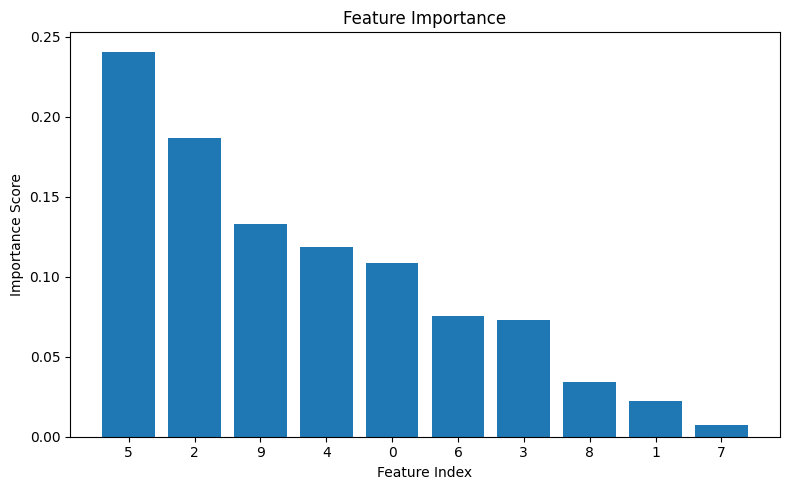

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples=1000, n_features=10, n_informative=7,
                           n_redundant=3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

#22. Train a Gradient Boosting Regressor and plot learning curves.

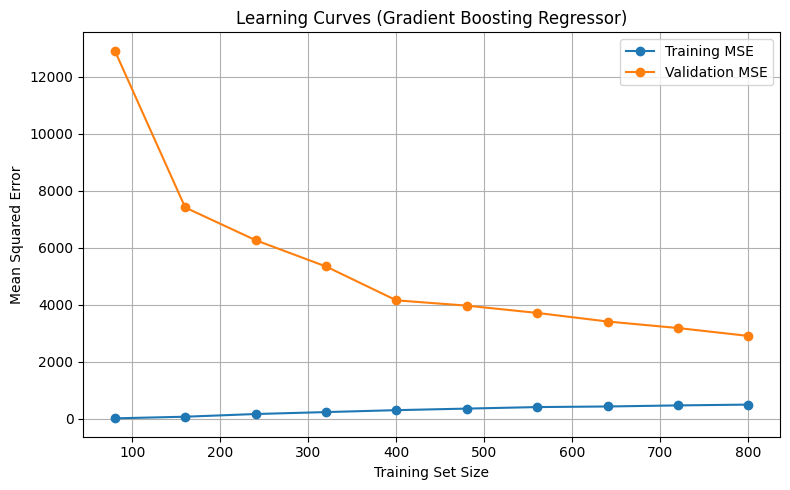

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

model = GradientBoostingRegressor()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=cv, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training MSE")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation MSE")
plt.title("Learning Curves (Gradient Boosting Regressor)")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.show()

#23. Train an XGBoost Classifier and visualize feature importance.

<Figure size 800x500 with 0 Axes>

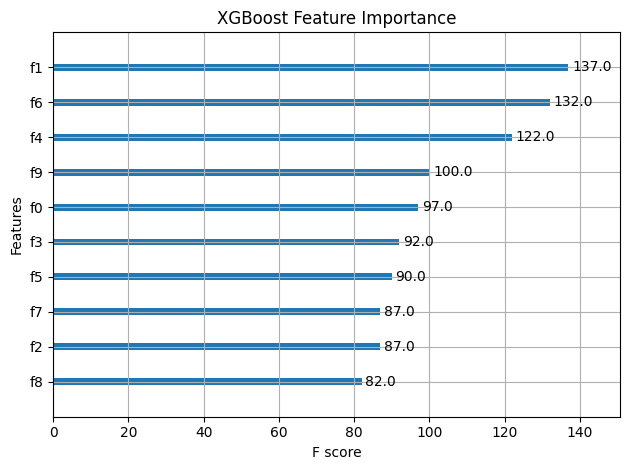

In [47]:
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, n_informative=7,
                           n_redundant=3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)

plt.figure(figsize=(8, 5))
plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

#24. Train a CatBoost Classifier and plot the confusion matrix.

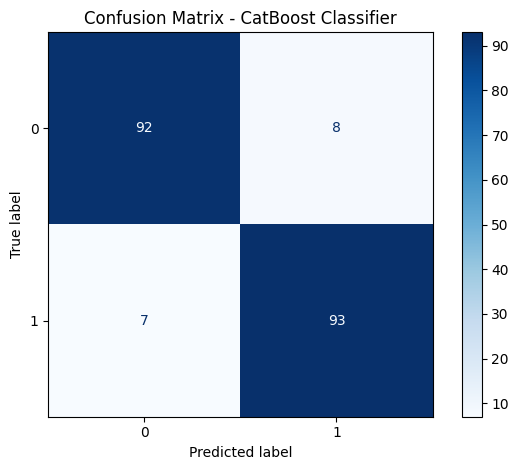

In [48]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, n_informative=7,
                           n_redundant=3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - CatBoost Classifier")
plt.tight_layout()
plt.show()

#25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

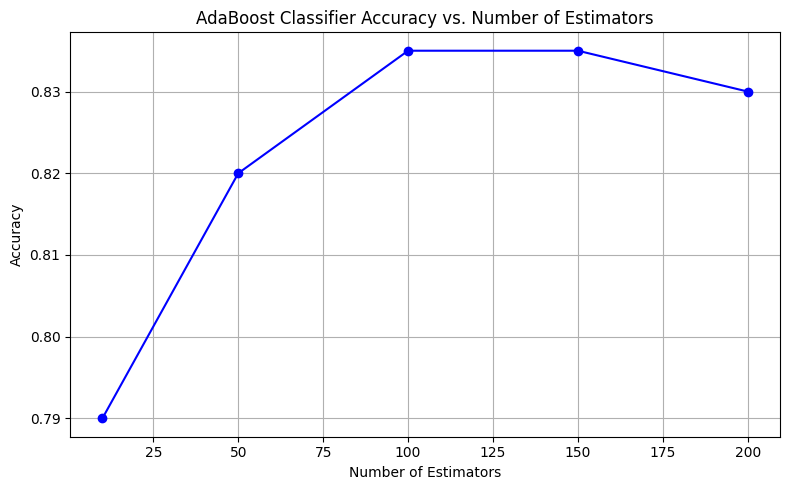

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators_list = [10, 50, 100, 150, 200]
accuracies = []

for n in n_estimators_list:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='-', color='blue')
plt.title("AdaBoost Classifier Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

#26. Train a Gradient Boosting Classifier and visualize the ROC curve.

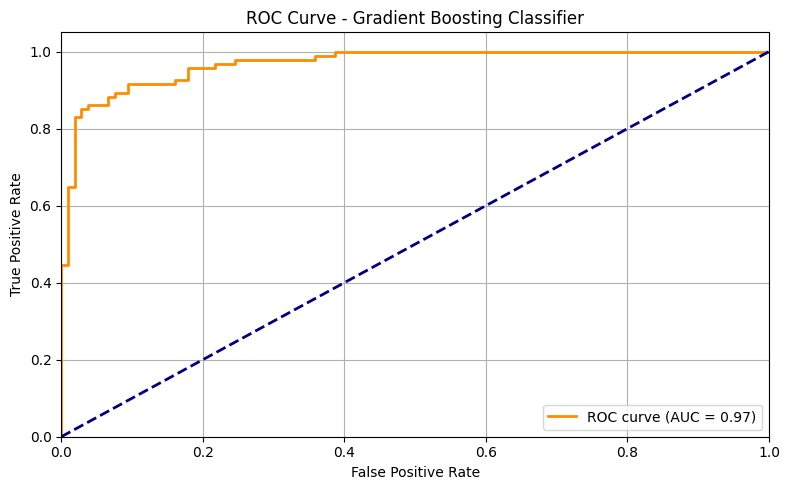

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

In [51]:
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

model = XGBRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best Learning Rate: {grid_search.best_params_['learning_rate']}")
print(f"Mean Squared Error: {mse:.4f}")

Best Learning Rate: 0.1
Mean Squared Error: 4845.6934


#28.  Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

In [52]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_sample_weight

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, weights=[0.95, 0.05], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier without class weighting
model_no_weight = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=0)
model_no_weight.fit(X_train, y_train)
y_pred_no_weight = model_no_weight.predict(X_test)
acc_no_weight = accuracy_score(y_test, y_pred_no_weight)

# Compute sample weights based on class distribution
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train CatBoost Classifier with class weighting
model_with_weight = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=0)
model_with_weight.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_with_weight = model_with_weight.predict(X_test)
acc_with_weight = accuracy_score(y_test, y_pred_with_weight)

# Compare accuracy
print(f"Accuracy without class weighting: {acc_no_weight:.4f}")
print(f"Accuracy with class weighting: {acc_with_weight:.4f}")

Accuracy without class weighting: 0.9550
Accuracy with class weighting: 0.9650


#29. Train an AdaBoost Classifier and analyze the effect of different learning rates.

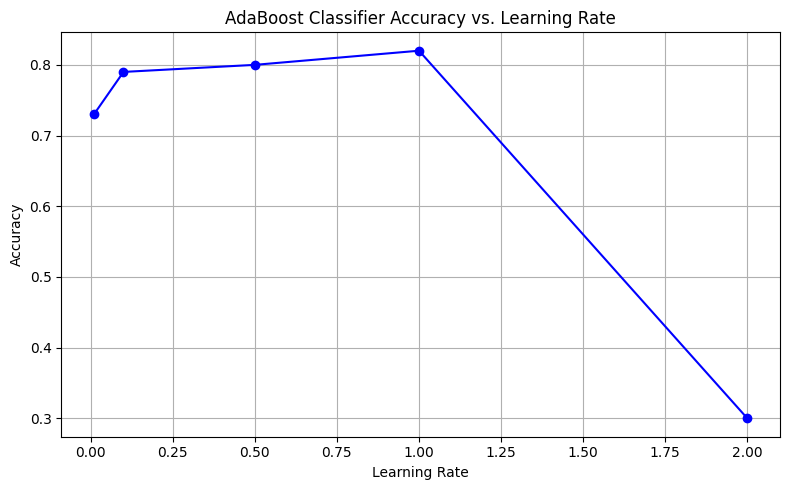

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rates = [0.01, 0.1, 0.5, 1.0, 2.0]
accuracies = []

for lr in learning_rates:
    model = AdaBoostClassifier(learning_rate=lr, n_estimators=50, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='blue')
plt.title("AdaBoost Classifier Accuracy vs. Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

#30.  Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

In [55]:
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import numpy as np

# Create a synthetic multi-class dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=15,
                           n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier for multi-class classification
model = XGBClassifier(objective='multi:softprob', num_class=3, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)

logloss = log_loss(y_test, y_pred_prob)

print(f"Log-Loss: {logloss:.4f}")

Log-Loss: 0.5212
